In [ ]:
%matplotlib inline


# Visualization of MLP weights on MNIST

Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance. The example will throw a warning because it
doesn't converge, in this case this is what we want because of CI's time
constraints.


In [1]:
print(X_train[0,:])

NameError: name 'X_train' is not defined

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009830
Iteration 2, loss = 0.15345341
Iteration 3, loss = 0.11544316
Iteration 4, loss = 0.09305058
Iteration 5, loss = 0.07870843
Iteration 6, loss = 0.07093436
Iteration 7, loss = 0.06236826
Iteration 8, loss = 0.05530422
Iteration 9, loss = 0.04932042
Iteration 10, loss = 0.04607797
Training set score: 0.987367
Test set score: 0.971100


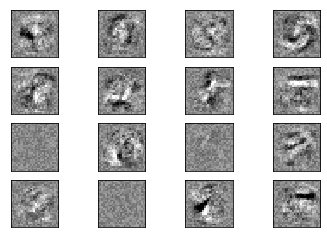

In [2]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
'''
# replaced with internal data loading
import sys
import os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
'''
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

#(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
# note: data is already normalized to [0,1)

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()